In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [72]:
dataset = load_digits()
data, target = dataset.data, dataset.target

In [73]:
data.shape

(1797, 64)

In [74]:
target.shape

(1797,)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [158]:
modelA = keras.models.Sequential()

modelA.add(keras.layers.Input(shape = data.shape[1:]))
modelA.add(keras.layers.Dense(100, activation = 'relu'))
modelA.add(keras.layers.Dense(50, activation = 'relu'))
modelA.add(keras.layers.Dense(10, activation = 'softmax'))

In [159]:
modelA.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                510       
Total params: 12,060
Trainable params: 12,060
Non-trainable params: 0
_________________________________________________________________


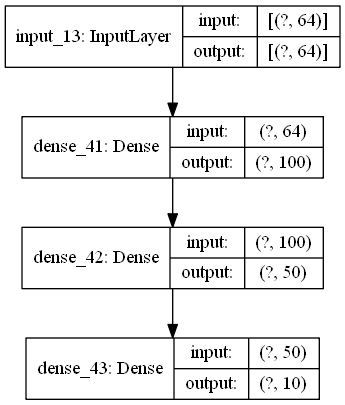

In [160]:
keras.utils.plot_model(modelA, show_layer_names=True, show_shapes = True)

In [161]:
modelA.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [162]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath = 'callbacks/check_point.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)

In [163]:
history = modelA.fit(X_train, y_train, validation_split = 0.3, epochs = 100, callbacks= [checkpoint_cb, earlystopping_cb])

Train on 879 samples, validate on 378 samples
Epoch 1/100
879/879 [==============================] - 0s 514us/sample - loss: 1.5397 - accuracy: 0.6177 - val_loss: 0.6659 - val_accuracy: 0.7910
Epoch 2/100
879/879 [==============================] - 0s 106us/sample - loss: 0.4577 - accuracy: 0.8726 - val_loss: 0.4638 - val_accuracy: 0.8704
Epoch 3/100
879/879 [==============================] - 0s 96us/sample - loss: 0.2899 - accuracy: 0.9158 - val_loss: 0.3304 - val_accuracy: 0.9180
Epoch 4/100
879/879 [==============================] - 0s 94us/sample - loss: 0.2120 - accuracy: 0.9465 - val_loss: 0.3117 - val_accuracy: 0.9127
Epoch 5/100
879/879 [==============================] - 0s 71us/sample - loss: 0.1714 - accuracy: 0.9556 - val_loss: 0.2977 - val_accuracy: 0.9206
Epoch 6/100
879/879 [==============================] - 0s 74us/sample - loss: 0.1401 - accuracy: 0.9693 - val_loss: 0.2513 - val_accuracy: 0.9339
Epoch 7/100
879/879 [==============================] - 0s 74us/sample - loss

In [164]:
modelA = keras.models.load_model('callbacks/check_point.h5')

In [165]:
modelA.evaluate(X_test, y_test)

540/540 [==============================] - 0s 184us/sample - loss: 0.1221 - accuracy: 0.9611


[0.12213447281607875, 0.9611111]

(0, 1)

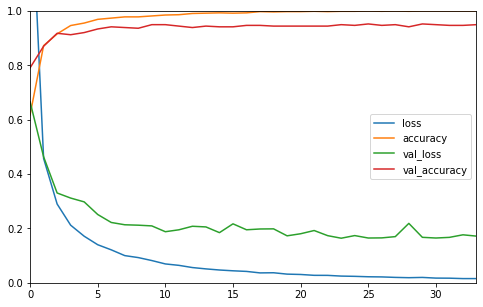

In [166]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.ylim(0, 1)

In [112]:
[print(i, sum(y_train == i)) for i in range(10)][0]

0 128
1 128
2 129
3 125
4 140
5 123
6 129
7 122
8 109
9 124


In [192]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [194]:
modelA_clone = keras.models.clone_model(modelA)
modelA_clone.set_weights(modelA.get_weights())

modelB = keras.models.Sequential(modelA_clone.layers[: -1])

modelB.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [195]:
for layer in modelB.layers[:-1]:
    layer.trainable = False

In [196]:
modelB.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [198]:
history = modelB.fit(X_train, y_train_3, epochs = 5, validation_split = 0.3)

Train on 879 samples, validate on 378 samples
Epoch 1/5
879/879 [==============================] - 0s 510us/sample - loss: 0.7126 - accuracy: 0.8134 - val_loss: 0.1851 - val_accuracy: 0.9206
Epoch 2/5
879/879 [==============================] - 0s 60us/sample - loss: 0.1697 - accuracy: 0.9397 - val_loss: 0.0956 - val_accuracy: 0.9630
Epoch 3/5
879/879 [==============================] - 0s 51us/sample - loss: 0.1181 - accuracy: 0.9613 - val_loss: 0.0827 - val_accuracy: 0.9709
Epoch 4/5
879/879 [==============================] - 0s 55us/sample - loss: 0.1010 - accuracy: 0.9716 - val_loss: 0.0772 - val_accuracy: 0.9709
Epoch 5/5
879/879 [==============================] - 0s 55us/sample - loss: 0.0882 - accuracy: 0.9761 - val_loss: 0.0663 - val_accuracy: 0.9815


In [199]:
for layer in modelB.layers[:-1]:
    layer.trainable = True

In [200]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath = 'callbacks/check_point2.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)

In [202]:
history = modelB.fit(X_train, y_train_3, epochs = 100, validation_split=0.3, callbacks=[checkpoint_cb, earlystopping_cb])

Train on 879 samples, validate on 378 samples
Epoch 1/100
879/879 [==============================] - 0s 72us/sample - loss: 0.0819 - accuracy: 0.9761 - val_loss: 0.0645 - val_accuracy: 0.9841
Epoch 2/100
879/879 [==============================] - 0s 483us/sample - loss: 0.0757 - accuracy: 0.9795 - val_loss: 0.0588 - val_accuracy: 0.9815
Epoch 3/100
879/879 [==============================] - 0s 140us/sample - loss: 0.0727 - accuracy: 0.9807 - val_loss: 0.0584 - val_accuracy: 0.9815
Epoch 4/100
879/879 [==============================] - 0s 96us/sample - loss: 0.0692 - accuracy: 0.9784 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 5/100
879/879 [==============================] - 0s 74us/sample - loss: 0.0640 - accuracy: 0.9795 - val_loss: 0.0713 - val_accuracy: 0.9762
Epoch 6/100
879/879 [==============================] - 0s 54us/sample - loss: 0.0632 - accuracy: 0.9841 - val_loss: 0.0589 - val_accuracy: 0.9841
Epoch 7/100
879/879 [==============================] - 0s 56us/sample - loss

In [203]:
modelB.evaluate(X_test, y_test_3)

540/540 [==============================] - 0s 37us/sample - loss: 0.0510 - accuracy: 0.9778


[0.05095935245906865, 0.9777778]